In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import scipy.misc

In [7]:
import imageio

In [23]:
imageio.imread?

In [24]:
img_rgb = imageio.imread('IMG_20181126_221904_HHT.jpg')
img = imageio.imread('IMG_20181126_221904_HHT.jpg', pilmode='L')

In [20]:
imageio.imread?

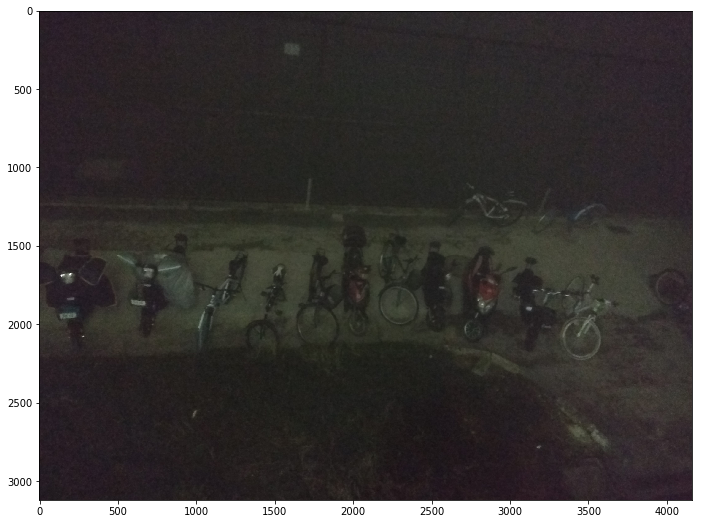

In [19]:
plt.figure(figsize=(16,9))
plt.imshow(img_rgb)

In [32]:
from matplotlib.patches import Rectangle


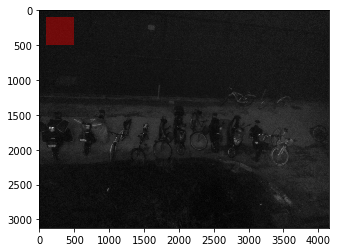

In [41]:

plt.figure(figsize=(6,4))
plt.imshow(img,cmap='gray')
rect = Rectangle((100, 100), 400, 400, facecolor='red', alpha=0.4 )
plt.gca().add_patch(rect)


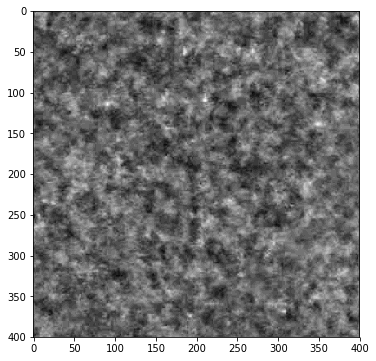

In [31]:
plt.figure(figsize=(8,6))
plt.imshow(img[100:500,100:500],cmap='gray')

从图中可以看到明显的噪声(倒挺像grass的“纹理”来着。。)，应该是大雾引起的.也许这是一种周期式噪声？让我们试试傅里叶去噪

Text(0.5,1,'Fourier transform')

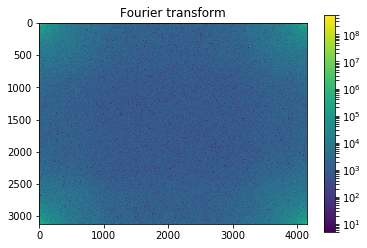

In [42]:
# https://www.scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html
from scipy import fftpack
im_fft = fftpack.fft2(img.astype(float))

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')


Text(0.5,1,'Filtered Spectrum')

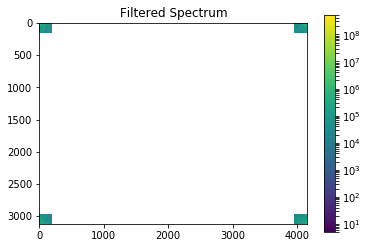

In [55]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.05

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')


Text(0.5,1,'Reconstructed Image')

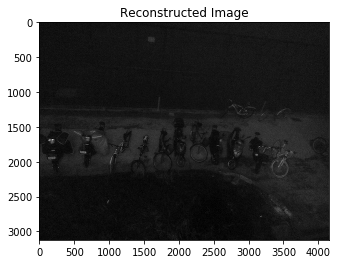

In [56]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')


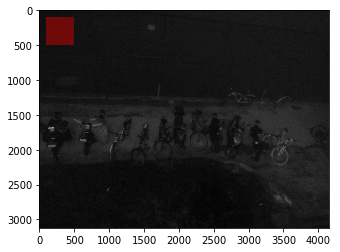

In [57]:

plt.figure(figsize=(6,4))
plt.imshow(im_new,cmap='gray')
rect = Rectangle((100, 100), 400, 400, facecolor='red', alpha=0.4 )
plt.gca().add_patch(rect)


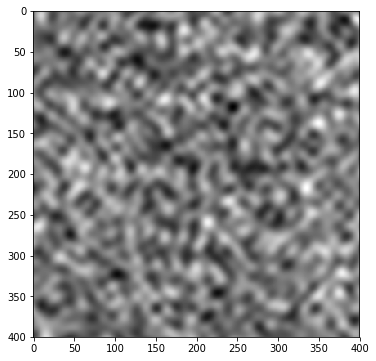

In [58]:
plt.figure(figsize=(8,6))
plt.imshow(im_new[100:500,100:500],cmap='gray')

In [59]:
imageio.imsave('IMG_20181126_221904_HHT_FFT.jpg',im_new)

看起来效果并不怎么样，看起来并不是频率式噪声。

In [85]:
vid = imageio.get_reader('VID_20181126_221930.mp4',  'ffmpeg')

In [86]:
vid.get_length()

47

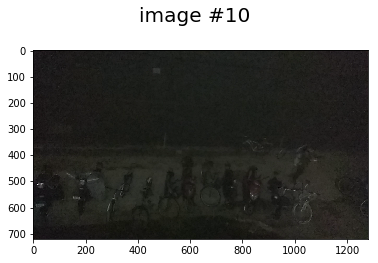

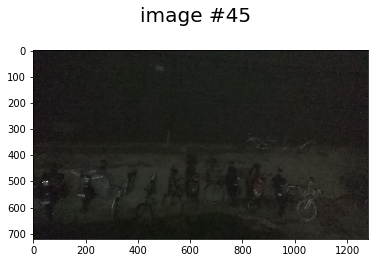

In [87]:
nums = [10, 45]

for num in nums:
    image = vid.get_data(num)
    fig = plt.figure()
    fig.suptitle('image #{}'.format(num), fontsize=20)
    plt.imshow(image)
plt.show()


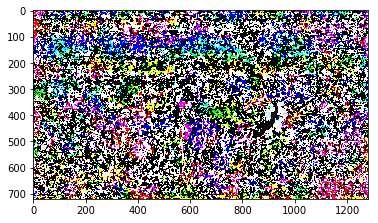

In [88]:
plt.imshow(vid.get_data(1) - vid.get_data(0))

In [89]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


In [90]:
frames = []
for i in range(vid.get_length()):
    frames.append(rgb2gray(vid.get_data(i)))

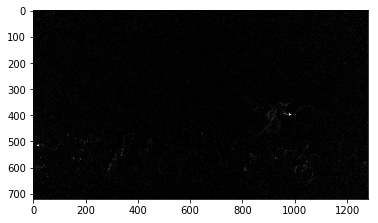

In [91]:
plt.imshow(np.abs(frames[1] - frames[0]), cmap='gray')

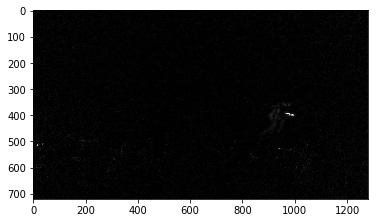

In [92]:
plt.imshow(np.abs(frames[2] - frames[1]), cmap='gray')

In [105]:
vid_writer = imageio.get_writer('VID_20181126_221930_diff.mp4',  'ffmpeg')

In [106]:
for i in range(vid.get_length()-1):
    di = np.abs(frames[i+1] - frames[i])
    vid_writer.append_data(di.astype(np.uint8))


In [107]:
vid_writer.close()

In [100]:
f = np.abs(frames[i+1] - frames[i])

(array([9.19848e+05, 1.50100e+03, 1.63000e+02, 4.90000e+01, 1.20000e+01,
        7.00000e+00, 1.10000e+01, 2.00000e+00, 4.00000e+00, 3.00000e+00]),
 array([  0. ,  20.7,  41.4,  62.1,  82.8, 103.5, 124.2, 144.9, 165.6,
        186.3, 207. ]),
 <a list of 10 Patch objects>)

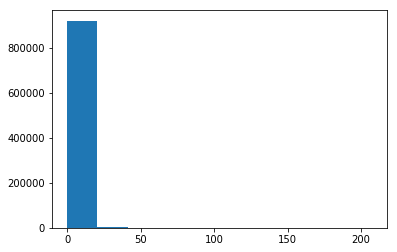

In [104]:
plt.hist(np.ravel(f.astype(np.uint8)))

In [108]:
arr = np.array(frames)

In [110]:
arr.shape

(47, 720, 1280)

In [114]:
arri = np.abs(arr - arr.mean(axis=0, keepdims = True)).astype(np.uint8)

In [115]:
vid_writer = imageio.get_writer('VID_20181126_221930_mean.mp4',  'ffmpeg')

In [116]:
for i in range(vid.get_length()):
    vid_writer.append_data(arri[i])


In [117]:
vid_writer.close()

In [118]:
def save_seq(seq, tag):
    vid_writer = imageio.get_writer('VID_20181126_221930_'+ tag +'.mp4',  'ffmpeg')
    for i in range(seq.shape[0]):
        vid_writer.append_data(seq[i])
    vid_writer.close()

In [120]:
arri = np.abs(arr - np.median(arr, axis=0, keepdims = True)).astype(np.uint8)

In [121]:
save_seq(arri, 'median')

In [122]:
mu = np.mean(arr, axis=0, keepdims=True)
sd = np.std(arr,  axis=0, keepdims=True)

In [126]:
arri = (np.abs((arr - mu)/sd)>3).astype(np.uint8) * 255

In [127]:
save_seq(arri, 'normal_single')